Mostly inspired from the tutorial of Justin Johnson in class [CS231](http://cs231n.github.io/python-numpy-tutorial/). Completed and modified by Jean Hennebert on 21.09.2018.

# Numpy quick tutorial


Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.

## Numpy arrays
A numpy array is a grid of values, all of the same type, and is indexed by integers. The number of *dimensions* is the rank of the array. The *shape* of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from Python lists, and access elements using square brackets. An array initialized fom a simple Python list is the equivalent from a mathematical vector.

In [1]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array from a Python list
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a)                  # Prints "[1,2,3]"
print(a.shape)            # Prints "(3,)", i.e. we have an array of 1 dimension with 3 elements
print(a[0])               # a[0] is the value at index 0 in the array, prints "0"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Changes an element of the array, here element at index 0
print(a)                  # Prints the array as "[5, 2, 3]"

<class 'numpy.ndarray'>
[1 2 3]
(3,)
1
1 2 3
[5 2 3]


As arrays are containing values of the same type, upward automatic conversions occurs such as from int to float, or from numeric values to strings. The result is an array with homogeneous types.

In [2]:
b = np.array([1,2,3,4.0])   # As arrays do not allow type mixing, automatic conversions occurs
print(b)                    # In b, ints are converted to float because of the presence of the float 4.0
c = np.array([1,2,3.0,'hi']) 
print(c)                    # In c, all numeric values are converted to strings

[1. 2. 3. 4.]
['1' '2' '3.0' 'hi']


Arrays can be defined with 2 dimensions by using nested lists. Typically, rank 2 arrays are used to represent matrices.

In [3]:
b = np.array([[1,2,3],[4,5,6]]) # Create a rank 2 array, equivalent to a 2X3 matrix
print(b)
print(b.shape)                  # Prints "(2, 3)", i.e. we have an array of 2 dims with 2 lines and 3 columns
print(b[0])                     # Prints the 1st element along dim 1, which is an array of rank 1, first line of matrix
print(b[0,2])                   # b[0,0] is the elements in position 0 along dim 1 and 2 along dim 2
print(b[0][2])                  # equivalent to b[0,2]
print(b[0,0], b[0,1], b[1,0])   # Prints "1 2 4"

[[1 2 3]
 [4 5 6]]
(2, 3)
[1 2 3]
3
3
1 2 4


## Array creation
Numpy also provides many functions to create arrays:

In [4]:
v = np.arange(4)      # Create a 1 dim array of increasing values from 0 to 3
print(v)              # Print "[0 1 2 3]

w = np.arange(10,100,5) # Create a 1 dim array of int values between 10 and 100 (excluded), by step of 5
print(w)              # Print [10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]

x = np.linspace(0,21,8) # Create a 1 dim array of 8 float values linearly spaced between 0 and 21
print(x)              # Print [ 0.  3.  6.  9. 12. 15. 18. 21.]

a = np.zeros((2,2))   # Create an array full of all zeros
print(a)              # Print  "[[ 0.  0.]
                      #          [ 0.  0.]]"
                      # The tuple (2,2) specifies the shape of the array

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Print  "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Print  "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Print  "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"


[0 1 2 3]
[10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
[ 0.  3.  6.  9. 12. 15. 18. 21.]
[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.34929834 0.9162105 ]
 [0.80840735 0.13572109]]


## Array indexing
Numpy offers several ways to index into arrays and we provide here a selection of useful tricks that may be useful for array manipulation in the context of Machine Learning exercises. The full indexing documentation can be found [here](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

Accessing single elements has been shown above.

**Slicing**. In a similar way as for Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array.

**Vues**. A slice produces a reference to a vue of the same data, meaning that if you change a value in the output of a slice, it will modify the original array.



In [5]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array.

In [6]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing**. When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array, doing copies of the original values. Here are some examples:

In [7]:
# Create the following rank 2 array with shape (3, 2)
# [[ 1  2 ]
#  [ 3  4 ]
#  [ 5  6 ]]
a = np.array([[1,2], [3, 4], [5, 6]])

# Here is an example of integer array indexing. The returned array will have shape (3,)
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [8]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "[[ 1,  2,  3],
          #          [ 4,  5,  6],
          #          [ 7,  8,  9],
          #          [10, 11, 12]]"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing**. Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [9]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


## Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays (see the [doc](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)). Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [10]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64
int64


## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module.

In [11]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [12]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([2, 3])
w = np.array([4, 5])

# Inner product of vectors; both produce 23
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [8 18]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

23
23
[ 8 18]
[ 8 18]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [13]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html).

## Array manipulation
Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The [documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) is exhaustive about array manipulation. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [14]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


## Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [15]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
v = np.array([1,0,1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [16]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
v = np.array([1,0,1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting`

In [17]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
v = np.array([1,0,1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [18]:
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


## Images

You can use the imshow function to show images. Here is an example:

(480, 320, 3)


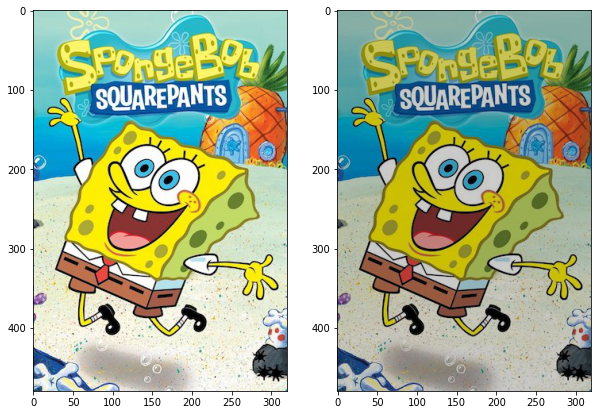

In [21]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

img = imageio.imread('sponge-bob.jpg')
print(img.shape)
img_tinted = img * [0.8, 0.8, 0.8]

plt.figure(figsize=(10, 10))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)
# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))

plt.show()

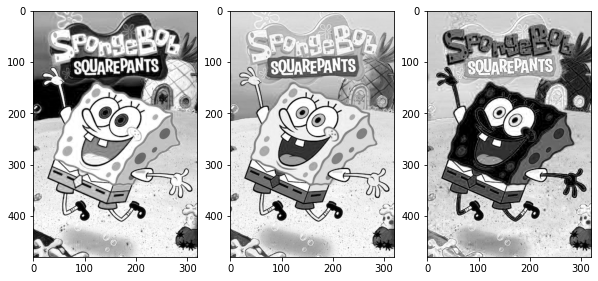

In [26]:
#######################################################################
# TODO:                                                               #
# Show the red, green and blue components of the image in 3 different #
# sub-plots                                                           #
#######################################################################
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(img[:,:,0],cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(img[:,:,1],cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(img[:,:,2],cmap="gray")

plt.show()
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

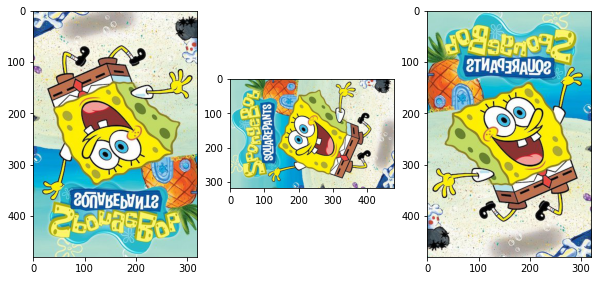

In [29]:
#######################################################################
# TODO:                                                               #
# Perform the following distorsion of the image and display it        #
#  - vertical flip                                                    #
#  - rotation 90 degrees                                              #
#  - horizontal flip
# Hint: have a look at the np.fliplr() function                       #
#######################################################################
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(img[::-1,:,:])

plt.subplot(1,3,2)
plt.imshow(np.rot90(img))

plt.subplot(1,3,3)
plt.imshow(img[:,::-1,:])

plt.show()
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################